<a href="https://colab.research.google.com/github/med-tz/yoga/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import numpy as np
import json
import os
import csv
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
asanas = ["bhujangasan", "padamasan", "shavasan", "tadasan", "trikonasan", "vrikshasan"]
data_path = "/gdrive/MyDrive/ft1/"

In [3]:
train_list = []
#list of asanas, each asana has all it's videos, each video has list of stacked 18*2 numpy np.arrays
val_list = []
test_list = []
k=0
for a in asanas:
    currAsanaTrain = []
    currAsanaVal = []
    currAsanaTest = []
    path = data_path + a + "/"
    for i in range(1,17):
        currVideo = []
        start = str(i) + "_"
        for filename in os.listdir(path):
            data = []
            if filename.startswith(start):
                #get data from file
                for filename1 in os.listdir(path + filename):
                    with open(path + filename + "/" + filename1) as json_data:
                        d = json.load(json_data)
                        try:
                            data = d['people'][0]['pose_keypoints_2d'][0:54]
                            k=k+1
                            if k%1000==0:
                                print("frames done: ",k)
                            #remove confidence values
                            for j in range(2,38,2):
                                data.pop(j)
                        except:
                            print ("Failed at" + filename+ "/" + filename1)
                            continue
                        json_data.close
                #separate X and Y coord
                    npdata = np.asarray(data)
                    Xdata = data[::2]
                    Ydata = data[1::2]
                    stk = np.dstack((Xdata, Ydata)) #stack vertically
                    currVideo.append(stk)
        #print currVideo
        if a == 'vrikshasan' and i == 15:
            # this one has difference and creates noise
            currAsanaTrain.append(currVideo)
        elif (i+1)%5 == 0 and len(currVideo) != 0:
            currAsanaTest.append(currVideo)
        elif (i)%5 == 0 and len(currVideo) != 0:
            currAsanaVal.append(currVideo)
        elif len(currVideo) != 0:
            currAsanaTrain.append(currVideo)
        #break
    train_list.append(currAsanaTrain)
    val_list.append(currAsanaVal)
    test_list.append(currAsanaTest)
    #break


frames done:  1000
frames done:  2000
frames done:  3000
frames done:  4000
frames done:  5000
frames done:  6000
frames done:  7000
frames done:  8000
frames done:  9000
frames done:  10000
frames done:  11000
frames done:  12000
frames done:  13000
frames done:  14000
frames done:  15000
frames done:  16000
frames done:  17000
frames done:  18000
frames done:  19000
frames done:  20000
frames done:  21000
frames done:  22000
frames done:  23000
frames done:  24000
frames done:  25000
frames done:  26000
frames done:  27000
frames done:  28000
frames done:  29000
frames done:  30000
frames done:  31000
frames done:  32000
frames done:  33000
frames done:  34000
frames done:  35000
frames done:  36000
frames done:  37000
frames done:  38000
Failed at1_Shav/Veena_Shav_000000000368_keypoints.json
Failed at1_Shav/Veena_Shav_000000000369_keypoints.json
Failed at1_Shav/Veena_Shav_000000000370_keypoints.json
Failed at1_Shav/Veena_Shav_000000000371_keypoints.json
Failed at1_Shav/Veena_Shav_00

for .json files that failed to open wehn i checked the files 
i found.

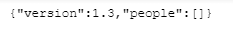

When i shecked the video here what i found:

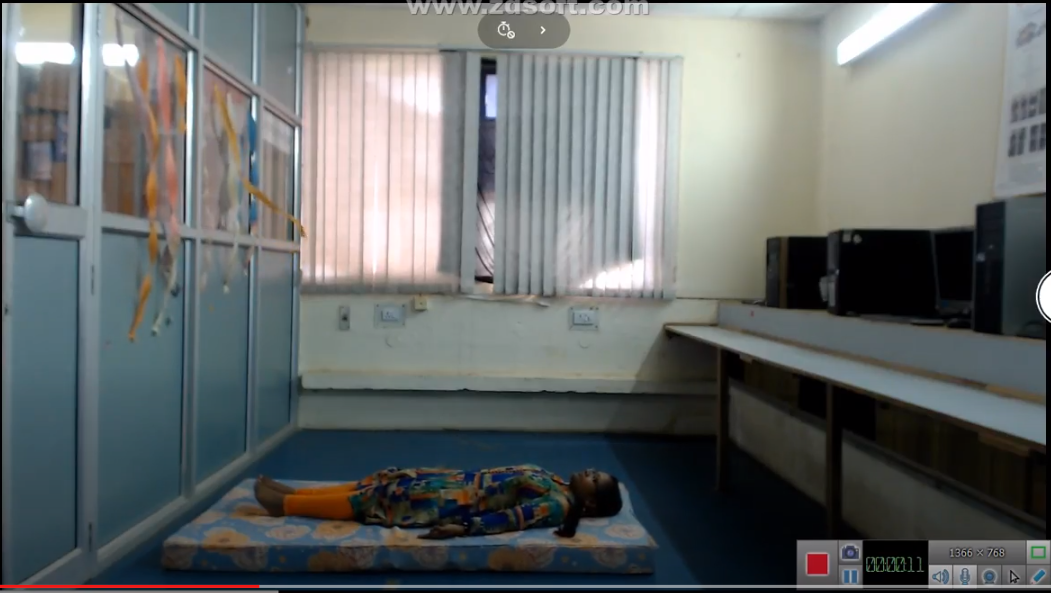

In [4]:
#videos in datset are 30 fps
window_size = 45 # number of frames in 1 test case
overlap_size = 36 # overlap between two testcase
train_cases = []
train_labels = []
for i, asana in enumerate(train_list):
    for vid in asana:
        for start in range(0, len(vid)-window_size, window_size - overlap_size):
            currCase = np.empty([window_size,18,2])
            for index in range(0,window_size):
                currCase[index] = vid[start+index]
            train_cases.append(currCase)
            train_labels.append(i)

In [6]:
print(len(train_cases))
print(len(train_labels))

7754
7754


In [8]:
test_cases = []
test_labels = []
for i, asana in enumerate(test_list):
    for vid in asana:
        for start in range(0, len(vid)-window_size, window_size - overlap_size):
            currCase = np.empty([window_size,18,2])
            for index in range(0,window_size):
                currCase[index] = vid[start+index]
            test_cases.append(currCase)
            test_labels.append(i)

In [9]:
print(len(test_cases))
print(len(test_labels))

2519
2519


In [10]:
val_cases = []
val_labels = []
for i, asana in enumerate(val_list):
    for vid in asana:
        for start in range(0, len(vid)-window_size, window_size - overlap_size):
            currCase = np.empty([window_size,18,2])
            for index in range(0,window_size):
                currCase[index] = vid[start+index]
            val_cases.append(currCase)
            val_labels.append(i)

In [11]:
print(len(val_cases))
print(len(val_labels))

2529
2529


In [12]:
#convert to numpy np.array and save
train_arr = np.empty([len(train_cases), window_size, 18, 2])
for i, ele in enumerate(train_cases):
    train_arr[i] = ele

In [13]:
test_arr = np.empty([len(test_cases), window_size, 18, 2])
for i, ele in enumerate(test_cases):
    test_arr[i] = ele

In [14]:
val_arr = np.empty([len(val_cases), window_size, 18, 2])
for i, ele in enumerate(val_cases):
    val_arr[i] = ele

In [16]:
np.save("/gdrive/MyDrive/trainX", train_arr)
np.save("/gdrive/MyDrive/testX", test_arr)
np.save("/gdrive/MyDrive/valX", val_arr)
np.save("/gdrive/MyDrive/trainY", np.asarray(train_labels))
np.save("/gdrive/MyDrive/testY", np.asarray(test_labels))
np.save("/gdrive/MyDrive/valY", np.asarray(val_labels))